In [1]:
cd ../ddf

/home/viknesh/NUS/artificalData/artificial-dataset-generation/ddf


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from ddf.DirtyDF import *
from ddf.stainer import *

# Example Data 

In [3]:
angled_blob = pd.read_csv("data/sim_anneal/angled_blob.csv", index_col = 0)
less_angled_blob = pd.read_csv("data/sim_anneal/less_angled_blob.csv", index_col = 0)
random_cloud = pd.read_csv("data/sim_anneal/random_cloud.csv", index_col = 0)
slanted_less = pd.read_csv("data/sim_anneal/slanted_less.csv", index_col = 0)
dino = pd.read_csv("data/sim_anneal/Datasaurus_data.csv", header = None, names = ["x", "y"])

FileNotFoundError: [Errno 2] No such file or directory: 'data/sim_anneal/angled_blob.csv'

In [4]:
retail = pd.read_csv("../data/online_retail_small.csv", parse_dates = ["InvoiceDate"])
retail["Country"] = retail.Country.astype("category")

In [34]:
animal = pd.DataFrame([(0, 'Cat'), (1, 'Dog'), (2, 'Rabbit'), (3, 'Cat'), (4, 'Cat'), (5, 'Dog')],
                  columns=('id', 'class'))
animal["class"] = animal["class"].astype("category")

# Basic Dataset (Cat/Dog)
Shuffle / RowDuplicate / Inflection / Nullify

In [35]:
animal.shape

(6, 2)

In [53]:
shuffle_stainer = ShuffleStainer()
dup_stainer = RowDuplicateStainer(deg = 0.8, row_idx=[1,2,5], max_rep = 2)
inflection_stainer = InflectionStainer()
null_stainer = NullifyStainer(deg = 0.1) # ,new_val , new_type = True)

In [7]:
test1 = DirtyDF(animal, seed = 123).add_stainers([shuffle_stainer, dup_stainer, inflection_stainer, null_stainer])

In [54]:
test2 = DirtyDF(animal, seed = 123).add_stainers([shuffle_stainer, dup_stainer], use_orig_row=True)

In [55]:
test2.summarise_stainers()

1. Shuffle
2. Add Duplicates


In [56]:
r3 = test2.run_stainer()

In [57]:
r3.get_df()

,id,class
0,4,Cat
1,0,Cat
2,2,Rabbit
3,3,Cat
4,1,Dog
5,5,Dog


In [36]:
animal

,id,class
0,0,Cat
1,1,Dog
2,2,Rabbit
3,3,Cat
4,4,Cat
5,5,Dog


In [9]:
r1 = test1.run_stainer()
r2 = r1.run_stainer()

In [11]:
r_final = test1.run_stainer().run_stainer().run_stainer().run_stainer()

In [12]:
r2.get_df()

,id,class
0,4,Cat
1,0,Cat
2,0,Cat
3,0,Cat
4,2,Rabbit
5,2,Rabbit
6,3,Cat
7,1,Dog
8,1,Dog
9,1,Dog


In [135]:
r2.get_mapping()

{0: [1, 2, 3], 1: [7, 8, 9], 2: [4, 5], 3: [6], 4: [0], 5: [10]}

In [136]:
r2.get_map_from_history(0)

{4: [0], 0: [1], 2: [2], 3: [3], 1: [4], 5: [5]}

In [137]:
r2.get_previous_map()

{0: [0], 1: [1, 2, 3], 2: [4, 5], 3: [6], 4: [7, 8, 9], 5: [10]}

In [157]:
r3 = test1.shuffle_stainers()
r3.summarise_stainers()

1. Nullify
2. Add Duplicates
3. Inflection
4. Shuffle


In [175]:
r3b = r3.run_stainer().run_stainer()
r3b.get_df()

,id,class
0,0,Cat
1,1,NaN
2,1,NaN
3,1,NaN
4,2,Rabbit
5,3,Cat
6,3,Cat
7,4,Cat
8,4,Cat
9,5,Dog


In [189]:
r3b.run_stainer().run_stainer().print_history()

1. Nullify 
 Replaced 1 values to become empty in specificed rows/cols. 
 Time taken: 0.0010068416595458984 

2. Add Duplicates 
 Added Duplicate Rows for 3 rows. 
  Each duplicated row should appear a maximum of 3 times. 
  Rows added: 4 
 Time taken: 0.001989603042602539 

3. Inflection 
 Categorical inflections on:
{1: {'Cat': ['CAT', 'cat', 'Cat', 'Cats'], 'Rabbit': ['rabbit', 'Rabbit', 'RABBIT', 'Rabbits'], 'Dog': ['dog', 'Dogs', 'Dog', 'DOG']}} 
 Time taken: 0.003989219665527344 

4. Shuffle 
 Order of rows randomized 
 Time taken: 0.22520709037780762 



In [183]:
for _ in range(300):
    test1.shuffle_stainers().run_stainer().run_stainer().run_stainer().run_stainer().summarise_stainers()

# Retail

In [191]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [190]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 278.8+ KB


In [216]:
dt_format_stainer = DatetimeFormatStainer()
date_format_stainer = DateFormatStainer()
dt_split_stainer = DatetimeSplitStainer()
func_stainer = FTransformStainer(deg = 1, col_idx = [5])

In [199]:
test2 = DirtyDF(retail, seed = 123)

In [186]:
test2.get_df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 278.8+ KB


In [212]:
r4 = test2.add_stainers([null_stainer, shuffle_stainer, dt_format_stainer, func_stainer]).run_all_stainers()

In [213]:
r4.get_df()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,NaN,12-January-2010 09:32:00,NaN,NaN,United Kingdom
1,536544,22375,AIRLINE BAG VINTAGE JET SET BROWN,2.0,12/Jan/2010 14:32:00,4769.52,NaN,United Kingdom
2,536749,85106,CUT GLASS HEXAGON T-LIGHT HOLDER,2.0,12-February-2010 13:49:00,12.81,17976.0,United Kingdom
3,536527,22244,3 HOOK HANGER MAGIC GARDEN,12.0,12/Jan/2010 13:04:00,7.03,12662.0,Germany
4,536412,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1.0,12-January-2010 11:49:00,19.11,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
4995,536544,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4.0,12-January-2010 14:32:00,368.71,NaN,United Kingdom
4996,536570,22113,GREY HEART HOT WATER BOTTLE,NaN,12/Jan/2010 15:35:00,29.67,14496.0,United Kingdom
4997,536409,85099B,JUMBO BAG RED RETROSPOT,2.0,12/Jan/2010 11:45:00,7.03,17908.0,United Kingdom
4998,536798,82567,"AIRLINE LOUNGE,METAL SIGN",12.0,NaT,8.17,17838.0,United Kingdom


In [214]:
r4.get_df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   InvoiceNo    4522 non-null   object  
 1   StockCode    4512 non-null   object  
 2   Description  4492 non-null   object  
 3   Quantity     4502 non-null   float64 
 4   InvoiceDate  4508 non-null   object  
 5   UnitPrice    4493 non-null   float64 
 6   CustomerID   3395 non-null   float64 
 7   Country      4469 non-null   category
dtypes: category(1), float64(3), object(4)
memory usage: 278.8+ KB


In [215]:
r4.print_history()

1. Nullify 
 Replaced 4000 values to become empty in specificed rows/cols. 
 Time taken: 1.1559135913848877 

2. Shuffle 
 Order of rows randomized 
 Time taken: 0.003989219665527344 

3. Datetime Formats 
 Date Formats used:
{4: ['%d/%b/%Y %H:%M:%S', '%d-%B-%Y %H:%M:%S']} 
 Time taken: 0.14062070846557617 

4. Function Transform 
 Converted column 5 with transformation exp. 
  
 Time taken: 0.028922080993652344 



In [289]:
r5 = test2.add_stainers([shuffle_stainer, dt_split_stainer, func_stainer, null_stainer]).run_stainer().run_stainer().run_stainer().run_stainer()

In [293]:
r5.get_mapping(axis = 1)

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4, 5, 6, 7, 8, 9],
 5: [10],
 6: [11],
 7: [12]}

In [294]:
r5.get_df()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate_day,InvoiceDate_month,InvoiceDate_year,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,UnitPrice,CustomerID,Country
0,536637,20878,SET/9 CHRISTMAS T-LIGHTS SCENTED,1.0,12,02,None,11,35,None,0.80,18041.0,United Kingdom
1,536530,22423,REGENCY CAKESTAND 3 TIER,1.0,12,01,2010,13,21,None,0.08,17905.0,United Kingdom
2,536401,22473,TV DINNER TRAY VINTAGE PAISLEY,1.0,12,01,2010,11,21,00,0.20,15862.0,United Kingdom
3,536749,22174,None,NaN,12,02,2010,13,49,00,NaN,NaN,United Kingdom
4,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,NaN,12,01,2010,11,49,None,0.34,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,536544,22558,CLOTHES PEGS RETROSPOT PACK 24,4.0,None,01,2010,14,32,00,0.40,NaN,United Kingdom
4996,536635,21428,None,8.0,12,02,None,11,22,00,0.24,15955.0,United Kingdom
4997,536544,85039A,None,3.0,12,01,2010,14,32,00,0.60,NaN,United Kingdom
4998,536396,None,EDWARDIAN PARASOL RED,6.0,12,01,2010,None,51,00,0.20,17850.0,United Kingdom


In [290]:
r5.print_history()

1. Shuffle 
 Order of rows randomized 
 Time taken: 0.004992008209228516 

2. Date Split 
 Split the following date columns: InvoiceDate 
 Time taken: 0.19748282432556152 

3. Function Transform 
 Converted column UnitPrice with transformation inverse. 
  
 Time taken: 0.003989458084106445 

4. Nullify 
 Replaced 6500 values to become empty in specificed rows/cols. 
 Time taken: 1.6526031494140625 



In [297]:
r6 = test2.add_stainers([shuffle_stainer, date_format_stainer, func_stainer, null_stainer]).run_stainer().run_stainer().run_stainer().run_stainer()

In [298]:
r6.print_history()

1. Shuffle 
 Order of rows randomized 
 Time taken: 0.002992391586303711 

2. Date Formats 
 Date Formats used:
{'InvoiceDate': ['%d/%B/%Y', '%Y,%d,%b']} 
 Time taken: 0.054853200912475586 

3. Function Transform 
 Converted column UnitPrice with transformation square. 
  
 Time taken: 0.0029921531677246094 

4. Nullify 
 Replaced 4000 values to become empty in specificed rows/cols. 
 Time taken: 0.9654204845428467 



In [303]:
r7 = test2.add_stainers([shuffle_stainer, dt_split_stainer, func_stainer, null_stainer, dup_stainer, inflection_stainer]).shuffle_stainers().run_all_stainers()

In [304]:
r7.print_history()

1. Date Split 
 Split the following date columns: InvoiceDate 
 Time taken: 0.1904902458190918 

2. Nullify 
 Replaced 6500 values to become empty in specificed rows/cols. 
 Time taken: 1.5907745361328125 

3. Inflection 
 Categorical inflections on:
{'Country': {'United Kingdom': ['United kingdom', 'United Kingdoms', 'UNITED KINGDOM', 'united kingdom', 'United Kingdom'], 'France': ['france', 'FRANCE', 'France', 'Frances'], 'Australia': ['AUSTRALIA', 'Australia', 'australia', 'Australium'], 'Netherlands': ['netherlands', 'NETHERLANDS', 'Netherland', 'Netherlands'], 'Germany': ['Germanies', 'germany', 'Germany', 'GERMANY'], 'Norway': ['Norways', 'NORWAY', 'Norway', 'norway'], 'EIRE': ['EIREs', 'eire', 'EIRE', 'Eire']}} 
 Time taken: 0.00498652458190918 

4. Add Duplicates 
 Added Duplicate Rows for 3000 rows. 
  Each duplicated row should appear a maximum of 3 times. 
  Rows added: 4528 
 Time taken: 0.10170316696166992 

5. Shuffle 
 Order of rows randomized 
 Time taken: 0.00797891616

In [305]:
for i in range(300):
    _ = test2.add_stainers([shuffle_stainer, dt_split_stainer, func_stainer, null_stainer, dup_stainer, inflection_stainer]).shuffle_stainers().run_all_stainers()

# Angled Blob

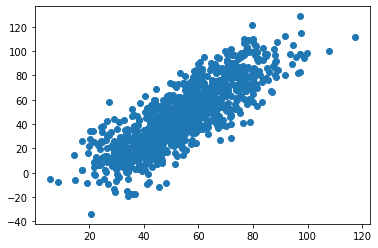

In [319]:
plt.scatter("x", "y", data = angled_blob)
plt.show()

In [325]:
binning = BinningStainer(col_idx = [0, 1])

In [326]:
test3 = DirtyDF(angled_blob, seed = 123)

In [329]:
test3.add_stainers([binning]).run_stainer().get_df()

,x,y
0,"[39.41, 49.33)","[40.33, 54.91)"
1,"[39.41, 49.33)","[-33.84, 23.93)"
2,"[39.41, 49.33)","[40.33, 54.91)"
3,"[49.33, 58.5)","[40.33, 54.91)"
4,"[69.14, 117.3]","[54.91, 71.58)"
...,...,...
995,"[58.5, 69.14)","[71.58, 128.6]"
996,"[49.33, 58.5)","[54.91, 71.58)"
997,"[58.5, 69.14)","[40.33, 54.91)"
998,"[5.839, 39.41)","[23.93, 40.33)"


In [327]:
test3.add_stainers([binning]).run_stainer().print_history()

1. Binning 
 Binning using the following cutpoints:
{'x': [5.839, 39.41, 49.33, 58.5, 69.14, 117.3], 'y': [-33.84, 23.93, 40.33, 54.91, 71.58, 128.6]} 
 Time taken: 0.007978677749633789 

